In [9]:
import numpy
import pandas as pd
import pandas
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

%matplotlib notebook
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('forestFires.csv')

In [11]:
data.values

array([[7, 5, 'mar', ..., 6.7, 0.0, 0.0],
       [7, 4, 'oct', ..., 0.9, 0.0, 0.0],
       [7, 4, 'oct', ..., 1.3, 0.0, 0.0],
       ...,
       [7, 4, 'aug', ..., 6.7, 0.0, 11.16],
       [1, 4, 'aug', ..., 4.0, 0.0, 0.0],
       [6, 3, 'nov', ..., 4.5, 0.0, 0.0]], dtype=object)

In [5]:
data[0:10]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
X        517 non-null int64
Y        517 non-null int64
month    517 non-null object
day      517 non-null object
FFMC     517 non-null float64
DMC      517 non-null float64
DC       517 non-null float64
ISI      517 non-null float64
temp     517 non-null float64
RH       517 non-null int64
wind     517 non-null float64
rain     517 non-null float64
area     517 non-null float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [27]:
avgArea = data['area'].sum() / data['area'].count()
print(avgArea)

12.847292069632493


In [28]:
dataframe = pandas.read_csv(r"forestFires.csv")

In [29]:
print("Correlation:", dataframe.corr(method = 'pearson'))
#Correlation table shows that Temp has most positive correlation to area affected (0.097844)

Correlation:              X         Y      FFMC       DMC        DC       ISI      temp  \
X     1.000000  0.539548 -0.021039 -0.048384 -0.085916  0.006210 -0.051258   
Y     0.539548  1.000000 -0.046308  0.007782 -0.101178 -0.024488 -0.024103   
FFMC -0.021039 -0.046308  1.000000  0.382619  0.330512  0.531805  0.431532   
DMC  -0.048384  0.007782  0.382619  1.000000  0.682192  0.305128  0.469594   
DC   -0.085916 -0.101178  0.330512  0.682192  1.000000  0.229154  0.496208   
ISI   0.006210 -0.024488  0.531805  0.305128  0.229154  1.000000  0.394287   
temp -0.051258 -0.024103  0.431532  0.469594  0.496208  0.394287  1.000000   
RH    0.085223  0.062221 -0.300995  0.073795 -0.039192 -0.132517 -0.527390   
wind  0.018798 -0.020341 -0.028485 -0.105342 -0.203466  0.106826 -0.227116   
rain  0.065387  0.033234  0.056702  0.074790  0.035861  0.067668  0.069491   
area  0.063385  0.044873  0.040122  0.072994  0.049383  0.008258  0.097844   

            RH      wind      rain      area  
X  

In [30]:
clean = data.drop(['month', 'day'], axis=1)

In [31]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 11 columns):
X       517 non-null int64
Y       517 non-null int64
FFMC    517 non-null float64
DMC     517 non-null float64
DC      517 non-null float64
ISI     517 non-null float64
temp    517 non-null float64
RH      517 non-null int64
wind    517 non-null float64
rain    517 non-null float64
area    517 non-null float64
dtypes: float64(8), int64(3)
memory usage: 44.5 KB


In [32]:
avgAreaClean = clean['area'].sum() / clean['area'].count()
print(avgAreaClean)

12.847292069632493


<IPython.core.display.Javascript object>


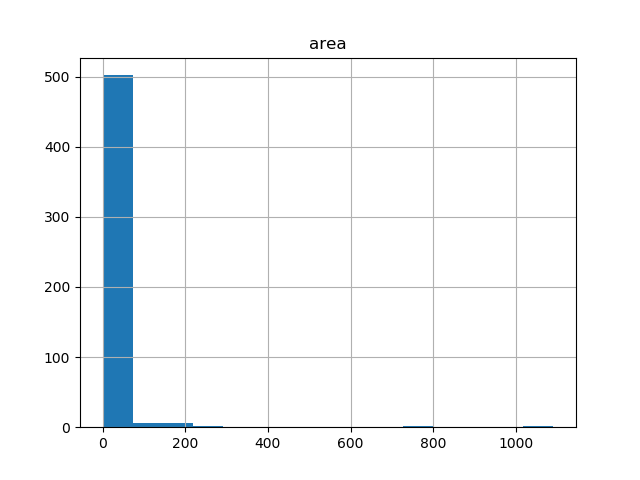

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1834f748>]],
      dtype=object)

In [33]:
clean.hist(column='area', bins=15)

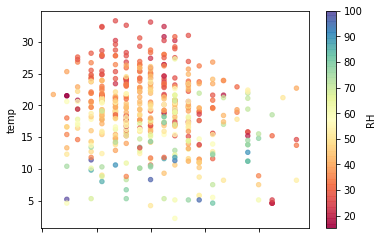

In [42]:
clean.plot.scatter(x = 'wind', y = 'temp', c = 'RH', cmap = 'Spectral', alpha=0.7)

<IPython.core.display.Javascript object>


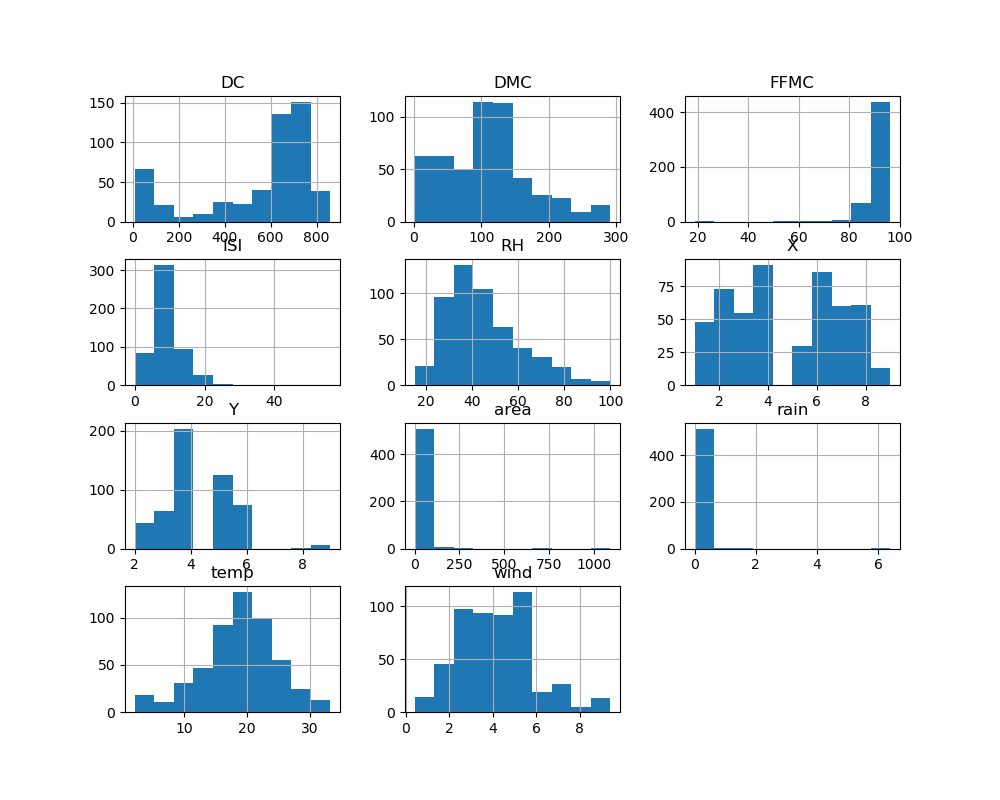

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a183f3518>,
      dtype=object)

In [34]:
dataframe.hist(figsize=(10, 8))
#This plot shows that temperature has a near Gaussian (Normal) distribution, thus having the most effect on Area
#RH seems like it is the second best attribute to analyze based on the figure

<IPython.core.display.Javascript object>


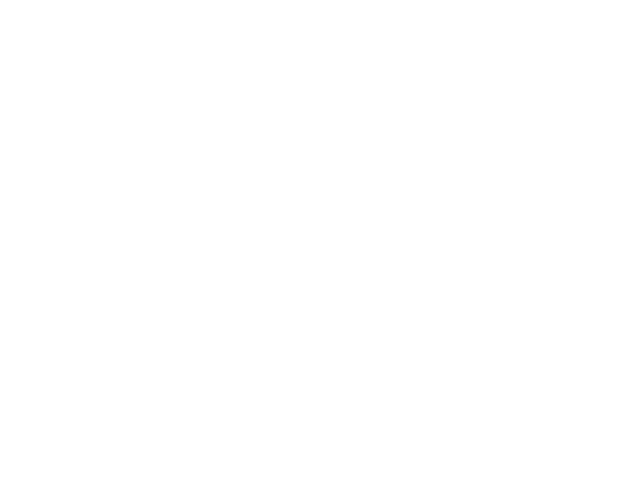

X          AxesSubplot(0.125,0.712609;0.168478x0.167391)
Y       AxesSubplot(0.327174,0.712609;0.168478x0.167391)
FFMC    AxesSubplot(0.529348,0.712609;0.168478x0.167391)
DMC     AxesSubplot(0.731522,0.712609;0.168478x0.167391)
DC         AxesSubplot(0.125,0.511739;0.168478x0.167391)
ISI     AxesSubplot(0.327174,0.511739;0.168478x0.167391)
temp    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
RH      AxesSubplot(0.731522,0.511739;0.168478x0.167391)
wind        AxesSubplot(0.125,0.31087;0.168478x0.167391)
rain     AxesSubplot(0.327174,0.31087;0.168478x0.167391)
area     AxesSubplot(0.529348,0.31087;0.168478x0.167391)
dtype: object

In [14]:
dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)

<IPython.core.display.Javascript object>


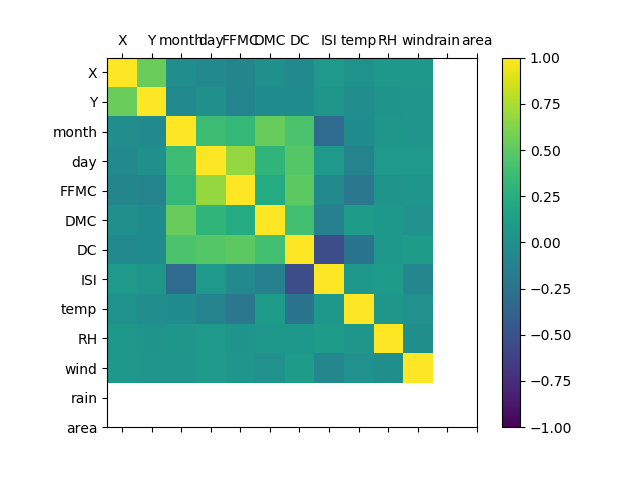

[Text(0,0,'X'),
 Text(0,0,'Y'),
 Text(0,0,'month'),
 Text(0,0,'day'),
 Text(0,0,'FFMC'),
 Text(0,0,'DMC'),
 Text(0,0,'DC'),
 Text(0,0,'ISI'),
 Text(0,0,'temp'),
 Text(0,0,'RH'),
 Text(0,0,'wind'),
 Text(0,0,'rain'),
 Text(0,0,'area')]

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(dataframe.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,13,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)

In [16]:
data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [36]:
print("Head:", data.head())

Head:    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


In [37]:
print("Shape:", data.shape)

Shape: (517, 13)


In [38]:
data.area.value_counts()

0.00     247
1.94       3
3.71       2
0.90       2
1.95       2
2.14       2
2.18       2
1.56       2
9.96       2
28.66      2
1.46       2
0.68       2
0.43       2
1.64       2
6.43       2
9.27       2
0.52       2
1.75       2
11.06      2
1.63       2
17.20      1
48.55      1
0.95       1
0.77       1
11.19      1
15.64      1
2.64       1
3.52       1
38.48      1
5.39       1
        ... 
1.61       1
1.07       1
6.38       1
5.86       1
3.19       1
11.16      1
8.85       1
86.45      1
5.18       1
30.18      1
2.01       1
1.01       1
20.03      1
0.79       1
49.59      1
4.41       1
7.02       1
0.71       1
9.41       1
0.09       1
3.32       1
11.53      1
5.55       1
3.20       1
4.88       1
1.26       1
2.44       1
2.03       1
2.21       1
24.24      1
Name: area, Length: 251, dtype: int64

In [39]:
col = ['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

In [40]:
train = data[col]

In [41]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(figsize=(10, 8))
corr = train.corr()
sb.heatmap(corr, annot=True)
plt.show()

In [1]:
data.values

NameError: name 'data' is not defined